# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

    # Note: I'll consider <---, ... as single tokens for convinience reasons
    
    
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com
    
    Its american tradition bitch

    Its , american , tradition , bitch
    
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones
    
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "
    
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m
    
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .
    
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

    iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki

    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !
    
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI
    
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)

    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland

    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland
    
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both

    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    
    Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , (  , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv
    
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)

    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )
    
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk

    Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [74]:
# this tokenizer is built following the tutorial provided here with some tweaks: https://huggingface.co/learn/nlp-course/chapter6/5

from typing import List
from collections import defaultdict
from transformers import AutoTokenizer

class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.merges = None
        self.word_freqs = None
        self.vocab = None
        self.pre_tokenizer = AutoTokenizer.from_pretrained("gpt2").backend_tokenizer.pre_tokenizer # using pre-tokenizer from gpt-2 to avoid hassle with punctuation and stuff
        

    # compute frequencies of different token pairs given tokenized text (helper function for train)
    def compute_pair_freqs(self, splits):
        pair_freqs = defaultdict(int)
        for word, freq in self.word_freqs.items():
            split = splits[word]
            if len(split) == 1:
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_freqs[pair] += freq
        return pair_freqs
        
    # helper function for train, that updates the word to tokenization map with updated vocabulary
    def merge_pair(self, a, b, splits):
        for word in self.word_freqs:
            split = splits[word]
            if len(split) == 1:
                continue
    
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    split = split[:i] + [a + b] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split
        return splits

    # main training fucntion
    def train(self, corpus: List[str]) -> None:

        # make a list of words present in corpus with their counts
        self.word_freqs = defaultdict(int)
        
        # fill the list
        for text in corpus:
            words_with_offsets = self.pre_tokenizer.pre_tokenize_str(text)
            new_words = [word for word, offset in words_with_offsets]
            for word in new_words:
                self.word_freqs[word] += 1
                
        # make a vocabulary with every symbol present in the sentence
        vocab = []
        for word in self.word_freqs.keys():
            for letter in word:
                if letter not in vocab:
                    vocab.append(letter)
        vocab.sort()
        
        # make a dictionary that maps every word to its tokenization
        splits = {word: [c for c in word] for word in self.word_freqs.keys()}

        merges = {}
        
        # as long as we have space for new tokens, make them.
        while len(vocab) < self.vocab_size:
            # compute frequencies of different token pairs
            pair_freqs = self.compute_pair_freqs(splits)

            # find the most common token pair
            best_pair = ""
            max_freq = 0
            for pair, freq in pair_freqs.items():
                if max_freq < freq:
                    best_pair = pair
                    max_freq = freq

            # add new token to vocabulary
            splits = self.merge_pair(*best_pair, splits)
            merges[best_pair] = best_pair[0] + best_pair[1]
            vocab.append(best_pair[0] + best_pair[1])

        # save it
        self.merges = merges
        self.vocab = vocab

    # tokenization function. Note, this tokenizer works by first splitting the words into symbols, then merging them back. Not the most optimal implementation, but easy to code.
    def tokenize(self, text: str) -> List[str]:
        # pre-tokenize the text
        pre_tokenize_result = self.pre_tokenizer.pre_tokenize_str(text)
        pre_tokenized_text = [word for word, offset in pre_tokenize_result]

        # split it into symbols
        splits = [[l for l in word] for word in pre_tokenized_text]
        
        # merge symbols into tokens
        for pair, merge in self.merges.items():
            for idx, split in enumerate(splits):
                i = 0
                while i < len(split) - 1:
                    if split[i] == pair[0] and split[i + 1] == pair[1]:
                        split = split[:i] + [merge] + split[i + 2 :]
                    else:
                        i += 1
                splits[idx] = split
                
        return sum(splits, [])

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [ ]:
# Your code here
corpus = []
corpus += open('file1').readlines()
corpus += open('file2').readlines()
corpus += open('file3').readlines()
corpus += open('file4').readlines()
corpus += open('file5').readlines()

In [75]:
x = [250, 500, 750, 1000]
y = []
for vocab_size in x:
    bpe = BPETokenizer(vocab_size)
    bpe.train(corpus)
    l = 0
    for line in corpus:
        l += len(bpe.tokenize(line))
    y.append(l / len(corpus))

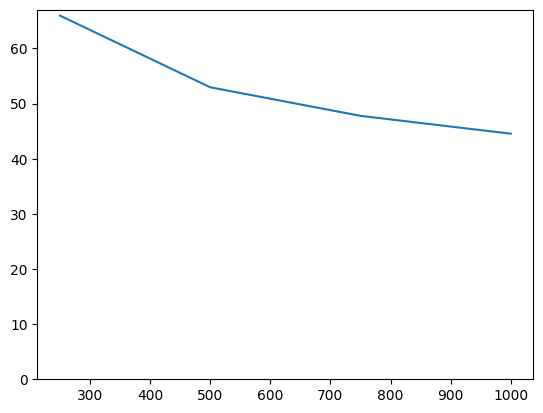

In [70]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1)
ax.plot(x, y)
ax.set_ylim(ymin=0)
plt.show(f)

Tweaking vocab size yields diminishing returns with bigger vocabulary. For the given task, a vocabulary of 500 or 750 should be sufficient, since there would be little benefit from expanding it further, and vocabulary of such size is big enough to learn common structrues and stop-words and handle them efficiently. For bigger datasets tho, a reasonably bigger vocabulary would be viable.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [61]:
# Your code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cl-tohoku/PheMT/main/mtnt_approp_annotated.tsv', sep='\t', header=None)
corpus_jap = df.head(1000)[4]
corpus_jap[1]

'きたない子育てがいいことだらけな理由'

In [64]:
jx = [250, 500, 750, 1000]
jy = []
for vocab_size in jx:
    bpe = BPETokenizer(vocab_size)
    bpe.train(corpus_jap)
    l = 0
    for line in corpus_jap:
        l += len(bpe.tokenize(line))
    jy.append(l / len(corpus_jap))

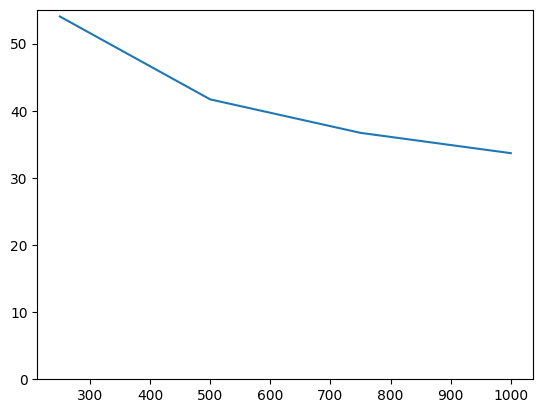

In [66]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1)
ax.plot(jx, jy)
ax.set_ylim(ymin=0)
plt.show(f)